In [1]:
# pip install finance-datareader, bs4, scikit-learn, tqdm
! pip -q install --upgrade pip
! pip --disable-pip-version-check -q install finance-datareader
! pip --disable-pip-version-check -q install bs4
! pip --disable-pip-version-check -q install scikit-learn
! pip --disable-pip-version-check -q install tqdm

In [2]:
import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# open stock data
path = './open'
list_name = 'stock_list.csv'
sample_name = 'sample_submission.csv'

In [4]:
# print stock data by code
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
365,맘스터치,220630,KOSDAQ
366,다날,064260,KOSDAQ
367,제이시스메디칼,287410,KOSDAQ
368,크리스에프앤씨,110790,KOSDAQ


In [5]:
# set date
start_date = '20210104'
end_date = '20211105'
# make dayTable
start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])
print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}', )
display(Business_days.head()) # print 5 rows

WEEKDAY of "start_date" : 0
NUM of WEEKS to "end_date" : 44
HOW MANY "Business_days" : (220, 1)


,Date
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08


In [6]:
# X : 월 ~ 금
# y : 주

sample_code = stock_list.loc[0,'종목코드'] # 삼성전자
sample = fdr.DataReader(sample_code, start = start_date, end = end_date).reset_index()
# 평일 휴무일 처리
sample_padding = pd.merge(Business_days, sample, how = 'outer')
sample_padding['weekday'] = sample_padding.Date.apply(lambda x : x.weekday())
sample_padding['weeknum'] = sample_padding.Date.apply(lambda x : x.strftime('%V'))
sample_padding.Close = sample_padding.Close.ffill()
sample_padding.head(40)

,Date,Open,High,Low,Close,Volume,Change,weekday,weeknum
0,2021-01-04,81000.0,84400.0,80200.0,83000.0,38655276.0,0.024691,0,01
1,2021-01-05,81600.0,83900.0,81600.0,83900.0,35335669.0,0.010843,1,01
2,2021-01-06,83300.0,84500.0,82100.0,82200.0,42089013.0,-0.020262,2,01
3,2021-01-07,82800.0,84200.0,82700.0,82900.0,32644642.0,0.008516,3,01
4,2021-01-08,83300.0,90000.0,83000.0,88800.0,59013307.0,0.071170,4,01
5,2021-01-11,90000.0,96800.0,89500.0,91000.0,90306177.0,0.024775,0,02
6,2021-01-12,90300.0,91400.0,87800.0,90600.0,48682416.0,-0.004396,1,02
7,2021-01-13,89800.0,91200.0,89100.0,89700.0,36068848.0,-0.009934,2,02
8,2021-01-14,88700.0,90000.0,88700.0,89700.0,26393970.0,0.000000,3,02
9,2021-01-15,89800.0,91800.0,88000.0,88000.0,33431809.0,-0.018952,4,02


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(sample_padding['close'])
x_scaled

NameError: name 'sample_padding' is not defined

In [7]:
# scikit learn 기계학습 with 삼성전자
model = LinearRegression()

sample_padding = pd.pivot_table(data = sample_padding, values = 'Close', columns = 'weekday', index = 'weeknum')

x = sample_padding.iloc[0:-2].to_numpy() # 이번주
y = sample_padding.iloc[1:-1].to_numpy() # 다음주
y_0 = y[:,0] # 월
y_1 = y[:,1] # 화
y_2 = y[:,2] # 수
y_3 = y[:,3] # 목
y_4 = y[:,4] # 금

y_values = [y_0, y_1, y_2, y_3, y_4]

In [8]:
predictions = []
for y_value in y_values :
    model.fit(x,y_value) # 이번주로 다음주 학습
    prediction = []
    for x_public in sample_padding.iloc[0:-1].to_numpy():
        prediction.append(round(model.predict(np.expand_dims(x_public,0))[0]))
    predictions.append(prediction)
predictions = pd.DataFrame(np.array(predictions).T)

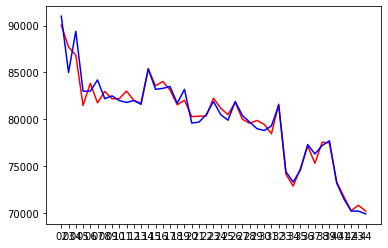

In [9]:
# show predict chart
plt.plot(predictions[0], 'r')
plt.plot(sample_padding[0][1:], 'b')
plt.show()

In [12]:
# 전체 주식 학습
sample_submission = pd.read_csv(os.path.join(path,sample_name))

model = LinearRegression()
for code in tqdm(stock_list['종목코드'].values): # 모든 종목에 대해 학습실행
    data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
    
    x = data.iloc[0:-2].to_numpy() # 2021년 1월 04일 ~ 2021년 10월 22일까지의 데이터로
    y = data.iloc[1:-1].to_numpy() # 2021년 1월 11일 ~ 2021년 10월 29일까지의 데이터를 학습한다.
    y_0 = y[:,0]
    y_1 = y[:,1]
    y_2 = y[:,2]
    y_3 = y[:,3]
    y_4 = y[:,4]

    y_values = [y_0, y_1, y_2, y_3, y_4]
    x_public = data.iloc[-2].to_numpy() # 2021년 11월 1일부터 11월 5일까지의 데이터를 예측할 것이다.
    
    predictions = []
    for y_value in y_values :
        model.fit(x,y_value)
        prediction = model.predict(np.expand_dims(x_public,0))
        predictions.append(prediction[0])
    sample_submission.loc[0:4,code] = predictions
if sample_submission.isna().sum().sum() == 0: # 실패 있는지 검사
    print("Complete")
else:
    print("Is Nah in sample_submission")

100%|████████████████████████████████████████████████████████████████████████████████| 370/370 [01:34<00:00,  3.93it/s]

Complete


In [13]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 371 entries, Day to 950130
dtypes: float64(370), object(1)
memory usage: 29.1+ KB


In [14]:
# 예측값 저장
sample_submission.to_csv('BASELINE_Linear.csv',index=False)